# Import Required Libraries
Import the necessary libraries, including pandas and scikit-learn.

In [44]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import Markdown
import numpy as np

# Load Dataset
Load the dataset into a pandas DataFrame.

In [45]:
# Load Dataset
file_path = "C:/Users/saina/OneDrive/Desktop/ele-int/complete_dataset.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

# Display the first few rows of the DataFrame
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


# Handle Missing Values
Identify and handle missing values in the dataset using techniques such as imputation or removal.

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load Dataset
file_path = "C:/Users/saina/OneDrive/Desktop/ele-int/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

df_cleaned = df.fillna(method='ffill').fillna(method='bfill')  # Forward & Backward Fill

# Option 2: Impute missing values
# For numerical columns, fill missing values with the mean
df_imputed = df.copy()
numeric_columns = df.select_dtypes(include=['number']).columns
df_imputed[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# For categorical columns, fill missing values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)

# Encode Categorical Variables

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
for column in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())

# Display the first few rows of the imputed DataFrame
print("Imputed DataFrame:")
print(df_imputed.head())

Missing values in each column:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64
Cleaned DataFrame:
         date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
4  2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.

C:\Users\saina\AppData\Local\Temp\ipykernel_11328\61196885.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='ffill').fillna(method='bfill')  # Forward & Backward Fill
C:\Users\saina\AppData\Local\Temp\ipykernel_11328\61196885.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)


# DEMAND ANALYSIS AND PRICE ANALYSIS


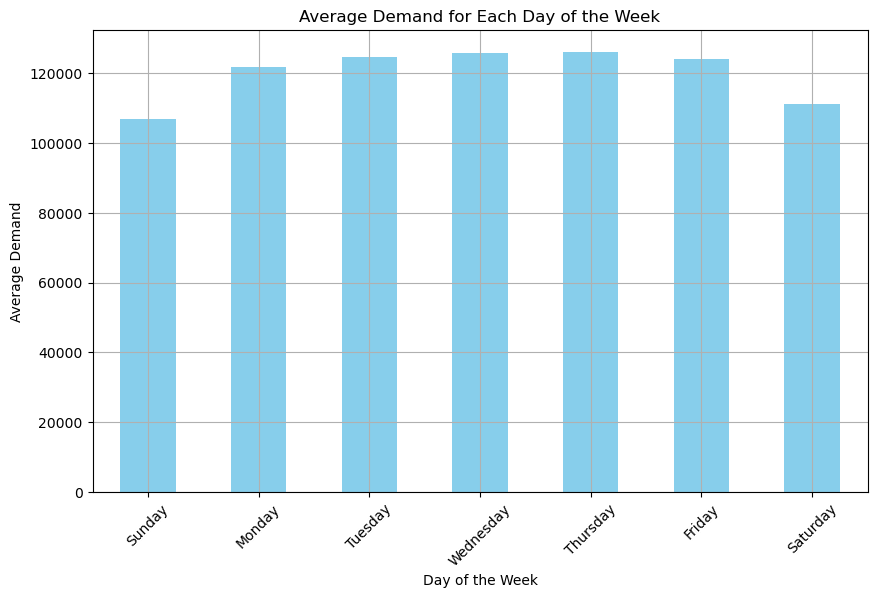

**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day.

In [47]:
# Demand and Price Analysis
import matplotlib.pyplot as plt
import calendar as cal

# Convert 'date' column to datetime format
import matplotlib.dates as mdates
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Add a column for the day of the week
df['day_of_week'] = df.index.day_name()

# Group by day of the week and calculate the average demand
average_demand_by_day = df.groupby('day_of_week')['demand'].mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot the average demand for each day of the week
plt.figure(figsize=(10, 6))
average_demand_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Demand for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
display(Markdown("**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day."))


 # Weekly Demand Variations

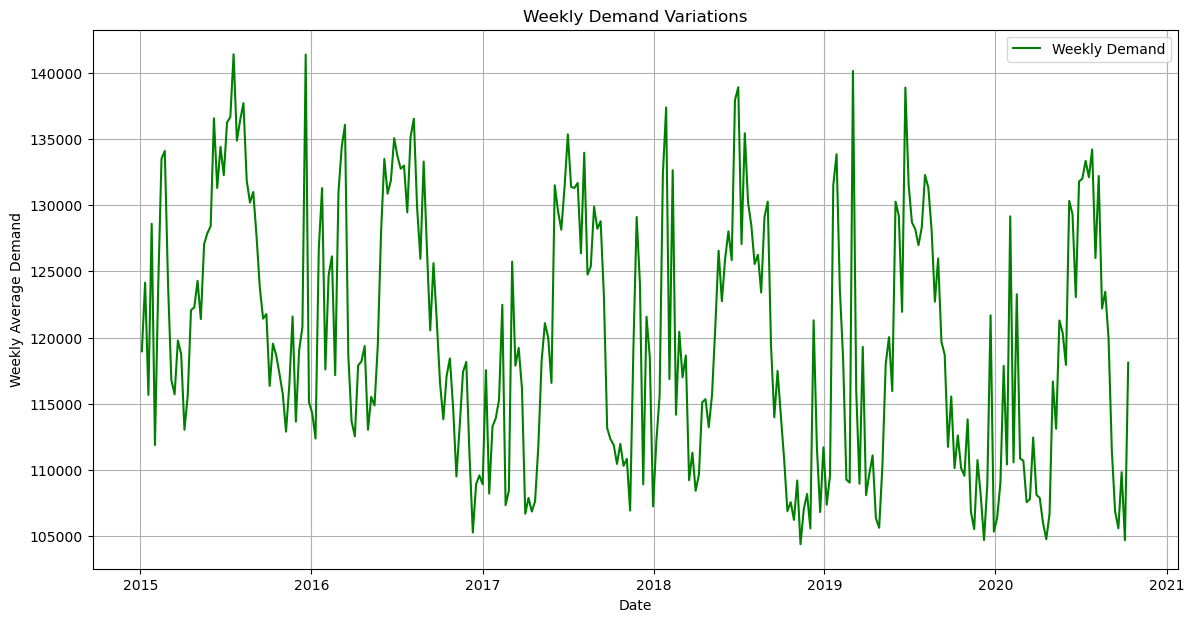

**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations.

In [48]:
# Plot weekly demand variations
weekly_demand = df['demand'].resample('W').mean()
plt.figure(figsize=(14, 7))
plt.plot(weekly_demand, label='Weekly Demand', color='green')
plt.title('Weekly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Weekly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations."))

# Yearly Demand Variations

C:\Users\saina\AppData\Local\Temp\ipykernel_11328\1418829592.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_demand = df['demand'].resample('Y').mean()


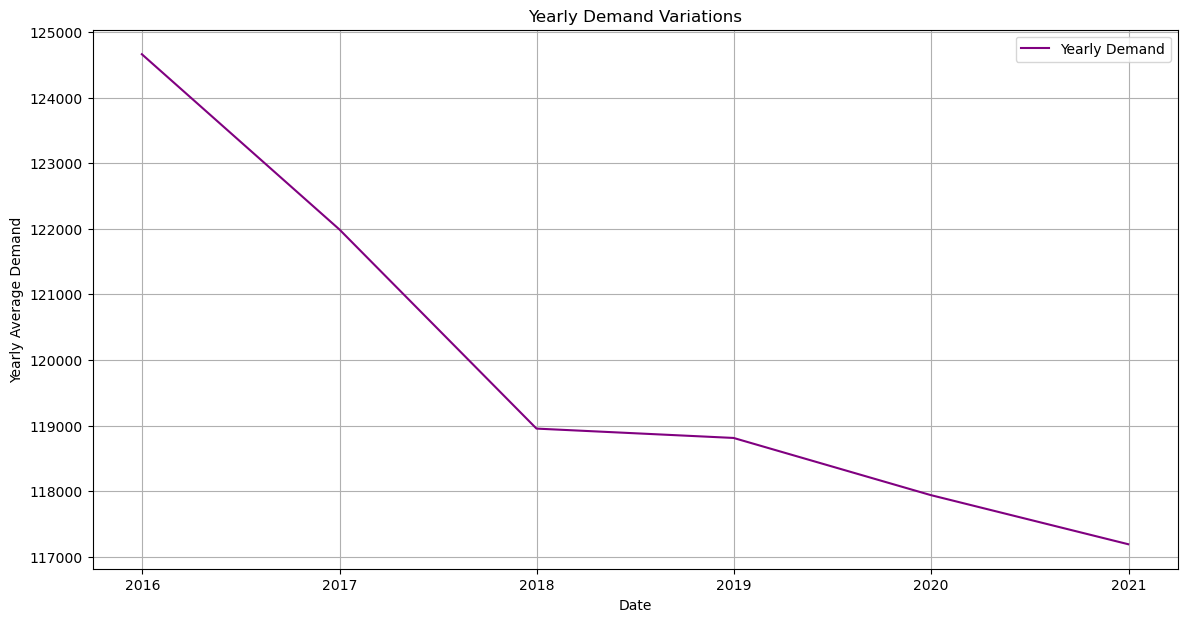

**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends.

In [49]:
# Plot yearly demand variations
yearly_demand = df['demand'].resample('Y').mean()
plt.figure(figsize=(14, 7))
plt.plot(yearly_demand, label='Yearly Demand', color='purple')
plt.title('Yearly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Yearly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends."))


# Demand vs. RRP Relationship

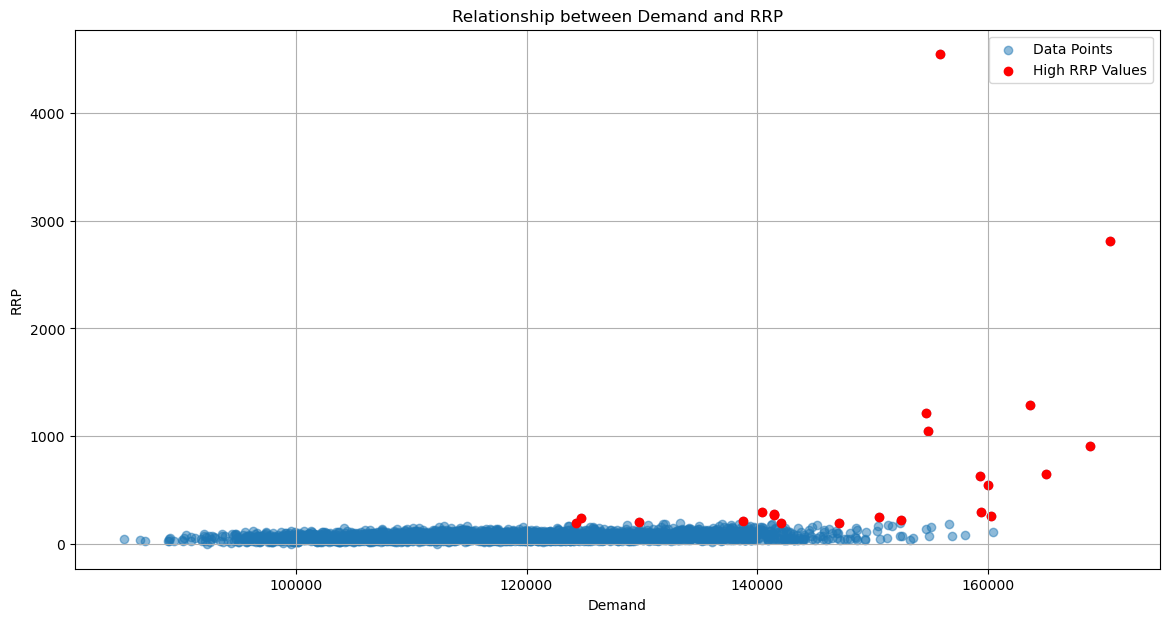

**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red.

In [50]:
# Analyze the relationship between demand and RRP
plt.figure(figsize=(14, 7))

# Identify high RRP values
high_rrp_threshold = df['RRP'].quantile(0.99)
high_rrp = df[df['RRP'] > high_rrp_threshold]

# Plot all data points
plt.scatter(df['demand'], df['RRP'], alpha=0.5, label='Data Points')

# Highlight high RRP values
plt.scatter(high_rrp['demand'], high_rrp['RRP'], color='red', label='High RRP Values')

plt.title('Relationship between Demand and RRP')
plt.xlabel('Demand')
plt.ylabel('RRP')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red."))


# Monthly Average Demand Analysis

C:\Users\saina\AppData\Local\Temp\ipykernel_11328\674040574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['demand'].resample('M').mean()


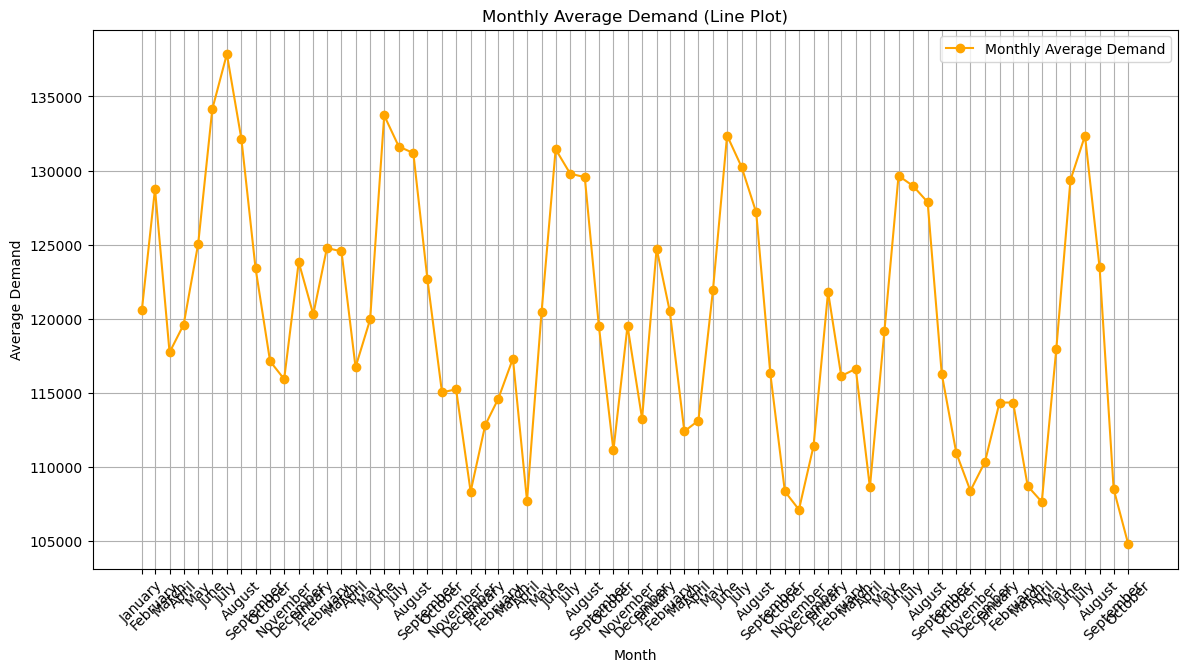

**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year.

In [51]:
# Plot monthly average demand as a line plot
monthly_demand = df['demand'].resample('M').mean()
plt.figure(figsize=(14, 7))
plt.plot(monthly_demand, marker='o', linestyle='-', color='orange', label='Monthly Average Demand')
plt.title('Monthly Average Demand (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Average Demand')
import calendar
month_names = [calendar.month_name[dt.month] for dt in monthly_demand.index]
plt.xticks(monthly_demand.index, month_names, rotation=45)
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year."))

# High Demand and Price Spikes

In [52]:
# Identify periods with high demand and significant price spikes
high_demand = df[df['demand'] > df['demand'].quantile(0.95)]
high_price_spikes = high_demand[high_demand['RRP'] > df['RRP'].quantile(0.95)]
print('Periods with high demand and significant price spikes:')
print(high_price_spikes)

Periods with high demand and significant price spikes:
                demand          RRP  demand_pos_RRP  RRP_positive  \
date                                                                
2015-12-17  152366.300   188.086125      152366.300    188.086125   
2016-01-13  160011.075   545.737820      160011.075    545.737820   
2016-03-08  160285.015   253.032032      160285.015    253.032032   
2016-07-05  142401.795   147.187692      142401.795    147.187692   
2017-02-08  142213.660   135.061279      142213.660    135.061279   
2017-02-09  155060.610   156.699561      151642.620    163.717084   
2017-08-03  151355.430   169.233827      151355.430    169.233827   
2017-11-29  151730.950   166.552647      151730.950    166.552647   
2018-01-18  154648.065  1210.137920      154648.065   1210.137920   
2018-01-19  165070.595   647.574163      165070.595    647.574163   
2018-01-28  159436.690   290.419644      159436.690    290.419644   
2018-02-07  159307.315   624.260934      159307.